In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [2]:
train = pd.read_csv("twitter_training.csv")
test = pd.read_csv("twitter_validation.csv")

In [3]:
train

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
train.columns=['id','information','type','text']
train.head()

,id,information,type,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
test.columns=['id','information','type','text']
test.head()

,id,information,type,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [6]:
train['lower']=train.text.str.lower()
train['lower']=[str(data) for data in train.lower]
train["lower"]=train.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) 

In [7]:
test['lower']=test.text.str.lower()
test['lower']=[str(data) for data in test.lower]
test["lower"]=test.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))

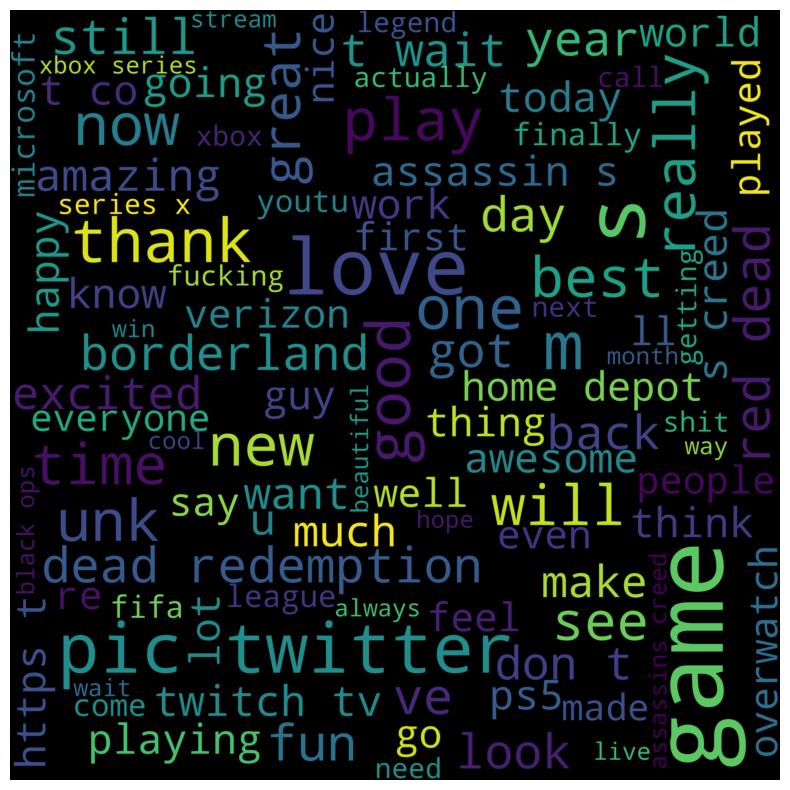

In [11]:
world_cloud_test = "".join(train[train['type']=='Positive'].lower)
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(world_cloud_test)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
world_cloud_test = "".join(train[train['type']=='Neutral'].lower)
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(world_cloud_test)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

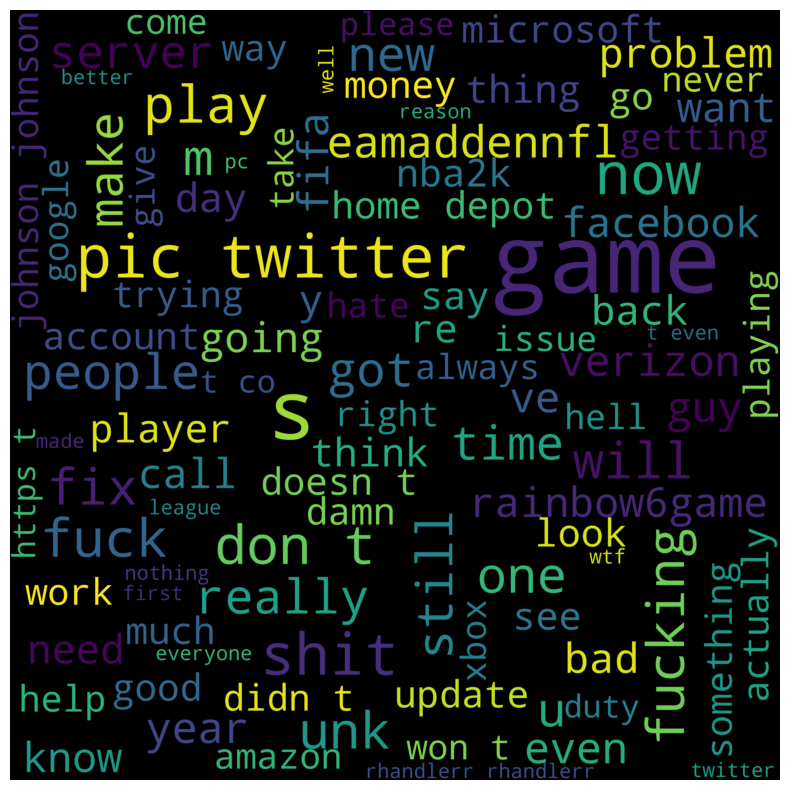

In [8]:
world_cloud_test = "".join(train[train['type']=='Negative'].lower)
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(world_cloud_test)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [12]:
plot1=train.groupby(by=["information","type"]).count().reset_index()
plot1.head()

,information,type,id,text,lower
0,Amazon,Irrelevant,192,186,192
1,Amazon,Negative,576,575,576
2,Amazon,Neutral,1236,1207,1236
3,Amazon,Positive,312,308,312
4,ApexLegends,Irrelevant,192,192,192


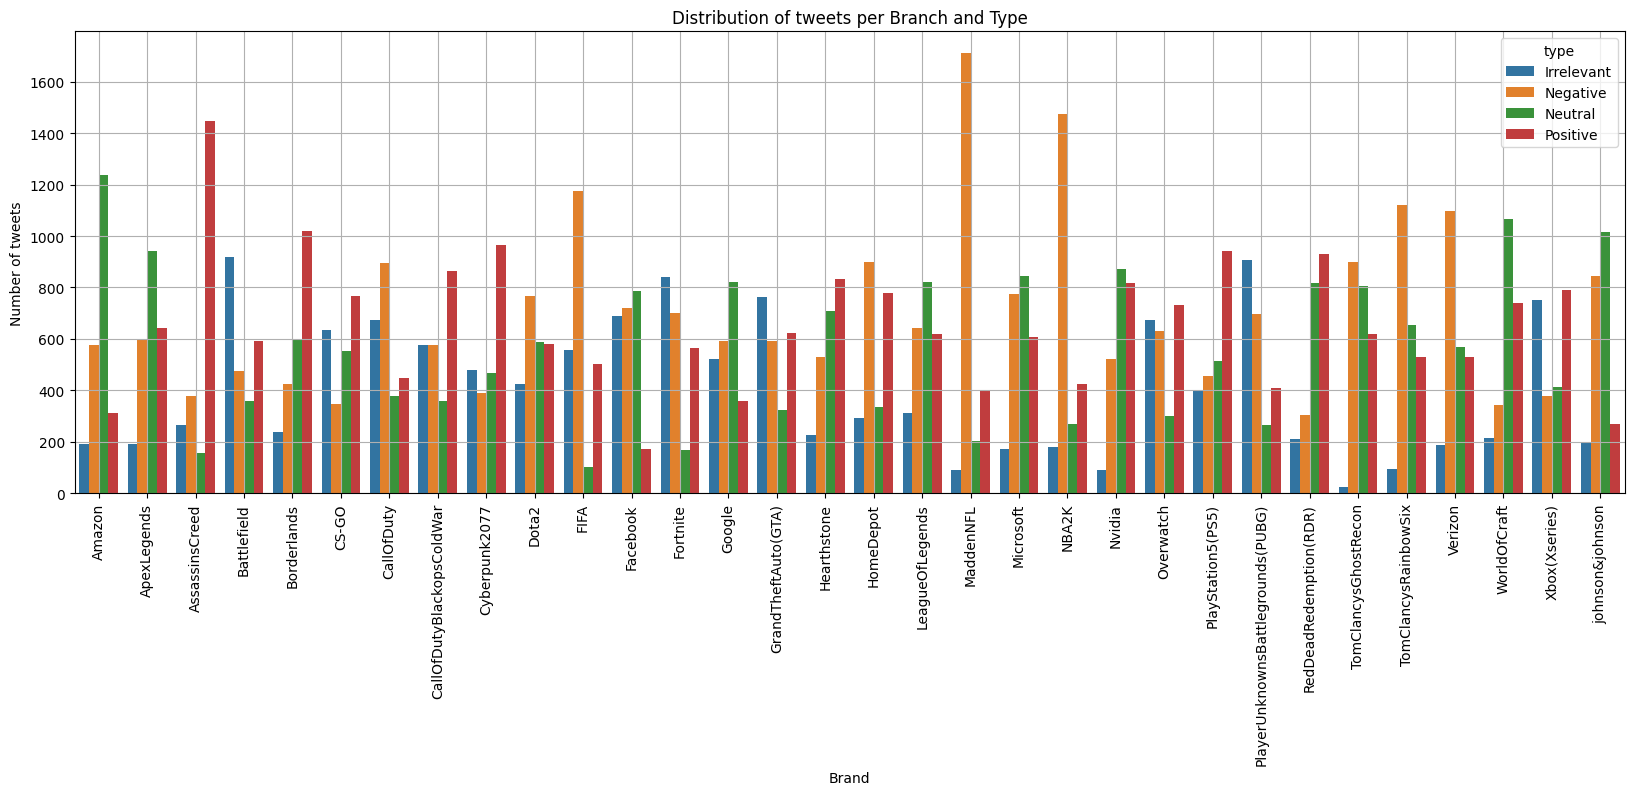

In [20]:
plt.figure(figsize=(20,6))
sns.barplot(data=plot1,x="information",y="id",hue="type")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Type");

In [13]:
import nltk
nltk.download('punkt')
import nltk
from nltk import word_tokenize
nltk.download('stopwords')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Window\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Window\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
tokens_text = [word_tokenize(str(word)) for word in train.lower]
tokens_counter =[items for sublist in tokens_text for items in sublist]
tokens_counter

['i',
 'am',
 'coming',
 'to',
 'the',
 'borders',
 'and',
 'i',
 'will',
 'kill',
 'you',
 'all',
 'im',
 'getting',
 'on',
 'borderlands',
 'and',
 'i',
 'will',
 'kill',
 'you',
 'all',
 'im',
 'coming',
 'on',
 'borderlands',
 'and',
 'i',
 'will',
 'murder',
 'you',
 'all',
 'im',
 'getting',
 'on',
 'borderlands',
 '2',
 'and',
 'i',
 'will',
 'murder',
 'you',
 'me',
 'all',
 'im',
 'getting',
 'into',
 'borderlands',
 'and',
 'i',
 'can',
 'murder',
 'you',
 'all',
 'so',
 'i',
 'spent',
 'a',
 'few',
 'hours',
 'making',
 'something',
 'for',
 'fun',
 'if',
 'you',
 'don',
 't',
 'know',
 'i',
 'am',
 'a',
 'huge',
 'borderlands',
 'fan',
 'and',
 'maya',
 'is',
 'one',
 'of',
 'my',
 'favorite',
 'characters',
 'so',
 'i',
 'decided',
 'to',
 'make',
 'myself',
 'a',
 'wallpaper',
 'for',
 'my',
 'pc',
 'here',
 'is',
 'the',
 'original',
 'image',
 'versus',
 'the',
 'creation',
 'i',
 'made',
 'enjoy',
 'pic',
 'twitter',
 'com',
 'mlsi5wf9jg',
 'so',
 'i',
 'spent',
 'a',


In [15]:
tokens_text

[['i',
  'am',
  'coming',
  'to',
  'the',
  'borders',
  'and',
  'i',
  'will',
  'kill',
  'you',
  'all'],
 ['im',
  'getting',
  'on',
  'borderlands',
  'and',
  'i',
  'will',
  'kill',
  'you',
  'all'],
 ['im',
  'coming',
  'on',
  'borderlands',
  'and',
  'i',
  'will',
  'murder',
  'you',
  'all'],
 ['im',
  'getting',
  'on',
  'borderlands',
  '2',
  'and',
  'i',
  'will',
  'murder',
  'you',
  'me',
  'all'],
 ['im',
  'getting',
  'into',
  'borderlands',
  'and',
  'i',
  'can',
  'murder',
  'you',
  'all'],
 ['so',
  'i',
  'spent',
  'a',
  'few',
  'hours',
  'making',
  'something',
  'for',
  'fun',
  'if',
  'you',
  'don',
  't',
  'know',
  'i',
  'am',
  'a',
  'huge',
  'borderlands',
  'fan',
  'and',
  'maya',
  'is',
  'one',
  'of',
  'my',
  'favorite',
  'characters',
  'so',
  'i',
  'decided',
  'to',
  'make',
  'myself',
  'a',
  'wallpaper',
  'for',
  'my',
  'pc',
  'here',
  'is',
  'the',
  'original',
  'image',
  'versus',
  'the',
  'c

In [16]:
import nltk
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Window\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
stops = nltk.corpus.stopwords
stop_words = stops.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
# Bag-of-words (BOW) is a simple yet powerful technique for representing text data. It converts a collection of text documents into a matrix of word counts. Each row in the matrix corresponds to a document, and each column corresponds to a word. The value in each cell is the number of times the corresponding word appears in the corresponding document.
#Initial Bag of Words
from sklearn.feature_extraction.text import CountVectorizer #Data transformation

bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, #English Stopwords
    ngram_range=(1, 1) #analysis of one word
)

## Now Training Our Model On training Data 

In [19]:
#Train - Test splitting
from sklearn.model_selection import train_test_split
training, testing = train_test_split(train, test_size=0.2, random_state=0)

In [20]:
x_train = bow_counts.fit_transform(training.lower)
x_test = bow_counts.transform(testing.lower)

c:\Users\Window\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Window\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


## Importing K means Clustering ANd MAking 3 Clusters 

In [21]:
from sklearn.cluster import KMeans

In [22]:
kmeans = KMeans(n_clusters=3, random_state=1)


In [23]:
kmeans.fit(x_train)


c:\Users\Window\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=1)

In [24]:
test_pred = kmeans.predict(x_test)


## silhouette_score gives vlues Ranging from -1 to 1 wheather our data lie in respective cluster or not 

In [25]:
from sklearn.metrics import silhouette_score

print("Silhouette Score: ", silhouette_score(x_test, test_pred))


Silhouette Score:  0.11778184430551306


## Using PCA for reduction of Dimension to view on scatter plot it gives 3 different clusters 

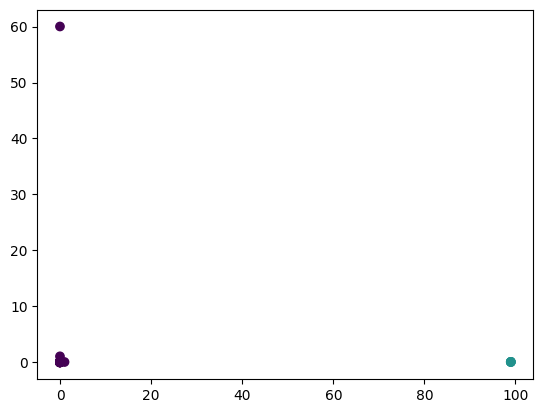

In [52]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_test.toarray())

# Create a scatter plot
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=test_pred)
plt.show()

### Testing Model On unseen Data 

In [53]:
#Train - Test splitting
from sklearn.model_selection import train_test_split
training, testing = train_test_split(test, test_size=0.2, random_state=0)

In [54]:
kmeans = KMeans(n_clusters=3, random_state=1)


In [55]:
kmeans.fit(x_train)


c:\Users\Talha Fareedi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=1)

In [56]:
test_pred = kmeans.predict(x_test)


In [26]:
from sklearn.metrics import silhouette_score

print("Silhouette Score: ", silhouette_score(x_test, test_pred))


Silhouette Score:  0.11778184430551306
